In [1]:
# Parameters 
GCM = 'ECMWF'
var_X = 't2m'
target_var = 'TMEAN'

+ UKMO  
+ ECMWF  
+ METEO_FRANCE   
+ DWD   
+ CMCC     
+ NCEP_CFSv2    
+ CanCM4i  
+ CanSIPSv2  
+ GEM_NEMO   
+ NASA_GEOSS2S      
+ JMA   

In [2]:
GCMs = ['UKMO', 'ECMWF', 'METEO_FRANCE', 'DWD', 'CMCC', 'NCEP_CFSv2', 'CanSIPSv2', 'GEM_NEMO', 'NASA_GEOSS2S','JMA']   

In [3]:
import sys
import pathlib

In [4]:
import numpy as np
import pandas as pd

In [5]:
sys.path.append('../../../../ml4seas/')

In [6]:
HOME = pathlib.Path.home()

In [7]:
dpath_target = HOME / 'research' / 'Smart_Ideas' / 'outputs' / 'targets' / 'NZ_regions' / 'NZ_6_regions'

In [8]:
targets = []
for reg in ['NNI','WNI','ENI','NSI','WSI','ESI']: 
    target = pd.read_csv(dpath_target / target_var / reg / f'TS_NZ_region_{reg}_{target_var}_3_quantiles_anoms.csv', index_col=0, parse_dates=True)
    target.columns = pd.MultiIndex.from_product([[reg],target.columns])
    targets.append(target)

In [9]:
targets = pd.concat(targets, axis=1)

In [10]:
targets_anomalies = targets.loc[:, (slice(None), ["anomalies"])]

In [11]:
target_terciles = targets.loc[:, (slice(None), ["cat_3"])]

In [12]:
targets_anomalies.columns = targets_anomalies.columns.droplevel(1)

In [13]:
target_terciles.columns = target_terciles.columns.droplevel(1)

In [40]:
acc_month_GCM = {}

for GCM in GCMs:
    print(f'Metrics for GCM {GCM}:\n')
    
    acc_month = {}
    
    for region_name in ['NNI','WNI','ENI','NSI','WSI','ESI']: 
        dpath_gcm = HOME / 'research' / 'Smart_Ideas'/ 'outputs' / 'targets' / 'GCMs' / 'NZ_6_regions' / GCM / var_X.upper() / region_name
        gcm_ts = pd.read_csv(dpath_gcm / f'TS_NZ_region_{region_name}_{GCM}_{var_X.upper()}_3_quantiles_anoms.csv', index_col=0)  
        tobs_cat = target_terciles.loc[:,[region_name]]
        tobs_anoms = targets_anomalies.loc[:,[region_name]]
        all_ts_terciles = gcm_ts.merge(tobs_cat, left_index=True, right_index=True)
        all_ts_anoms = gcm_ts.merge(tobs_anoms, left_index=True, right_index=True)
        acc = (all_ts_terciles.loc[:,'cat_3'] == all_ts_terciles.loc[:,region_name]).sum() / len(all_ts_terciles)
        
        
        
        l_acc = []
        
        for m in range(1, 13): 
            df = all_ts_terciles.loc[all_ts_terciles.index.month==m]
            acc = (df.loc[:,'cat_3'] == df.loc[:,region_name]).sum() / len(df)
            l_acc.append(acc)
        
        acc_month[region_name] = np.array(l_acc)
        
        R = all_ts_anoms.loc[:,['anomalies', region_name]].corr().iloc[0,1]
        print(f"accuracy for {region_name} {target_var} for regional TS derived from {GCM} = {acc:4.2f}, Pearson's R = {R:+4.2f}")
    
    print("\n------------------------------------------------------------------------------------------------------------------\n")
    
    acc_month_GCM[GCM] = acc_month

Metrics for GCM UKMO:

accuracy for NNI TMEAN for regional TS derived from UKMO = 0.50, Pearson's R = +0.38
accuracy for WNI TMEAN for regional TS derived from UKMO = 0.50, Pearson's R = +0.37
accuracy for ENI TMEAN for regional TS derived from UKMO = 0.42, Pearson's R = +0.30
accuracy for NSI TMEAN for regional TS derived from UKMO = 0.58, Pearson's R = +0.35
accuracy for WSI TMEAN for regional TS derived from UKMO = 0.58, Pearson's R = +0.33
accuracy for ESI TMEAN for regional TS derived from UKMO = 0.46, Pearson's R = +0.25

------------------------------------------------------------------------------------------------------------------

Metrics for GCM ECMWF:

accuracy for NNI TMEAN for regional TS derived from ECMWF = 0.50, Pearson's R = +0.41
accuracy for WNI TMEAN for regional TS derived from ECMWF = 0.50, Pearson's R = +0.41
accuracy for ENI TMEAN for regional TS derived from ECMWF = 0.50, Pearson's R = +0.33
accuracy for NSI TMEAN for regional TS derived from ECMWF = 0.67, Pe

In [39]:
acc_month_GCM

{'UKMO': {'ESI': array([0.375     , 0.29166667, 0.16666667, 0.39130435, 0.45833333,
         0.41666667, 0.45833333, 0.5       , 0.375     , 0.375     ,
         0.58333333, 0.45833333])},
 'ECMWF': {'ESI': array([0.41666667, 0.29166667, 0.16666667, 0.33333333, 0.54166667,
         0.45833333, 0.45833333, 0.5       , 0.29166667, 0.54166667,
         0.54166667, 0.375     ])},
 'METEO_FRANCE': {'ESI': array([0.54166667, 0.33333333, 0.29166667, 0.33333333, 0.58333333,
         0.41666667, 0.54166667, 0.45833333, 0.375     , 0.58333333,
         0.5       , 0.5       ])},
 'DWD': {'ESI': array([0.375     , 0.29166667, 0.125     , 0.29166667, 0.45833333,
         0.41666667, 0.5       , 0.45833333, 0.41666667, 0.375     ,
         0.58333333, 0.29166667])},
 'CMCC': {'ESI': array([0.5       , 0.375     , 0.25      , 0.33333333, 0.77777778,
         0.375     , 0.58333333, 0.41666667, 0.375     , 0.5       ,
         0.54166667, 0.5       ])},
 'NCEP_CFSv2': {'ESI': array([0.37142857, 0.485

In [41]:
df_acc_month = []
for GCM in GCMs: 
    df_acc_month.append(pd.DataFrame(acc_month_GCM[GCM]))

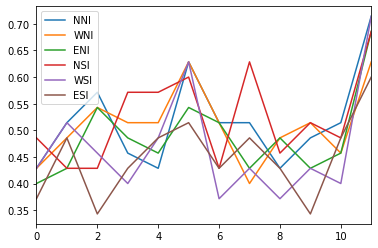

In [50]:
pd.DataFrame(acc_month_GCM['NCEP_CFSv2']).plot()